<a href="https://colab.research.google.com/github/NguyenHuynhNgoc20146187/AI/blob/main/Baitap_skfuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

53.33333333333336


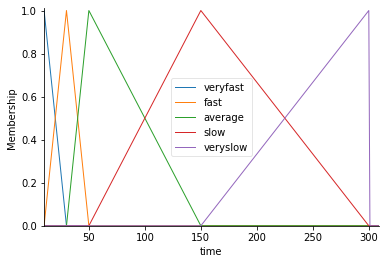

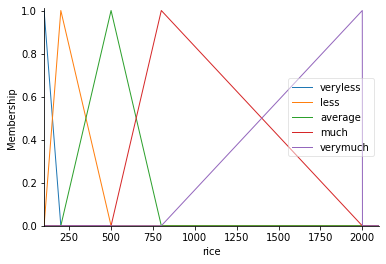

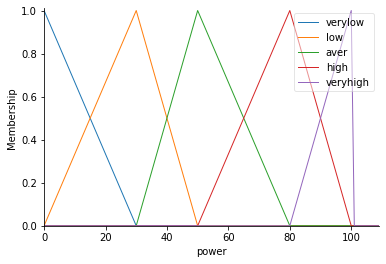

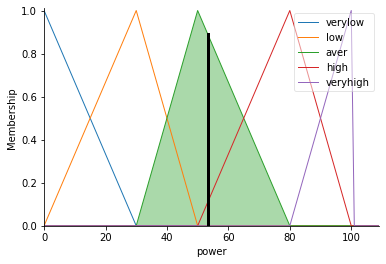

In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,310,1),'time') 
rice = ctrl.Antecedent(np.arange(100,2100,1),'rice')
power = ctrl.Consequent(np.arange(0,110,1),'power')

time['veryfast'] = fuzz.trimf(time.universe,[10,10,30]) 
time['fast'] = fuzz.trimf(time.universe,[10,30,50]) 
time['average'] = fuzz.trimf(time.universe,[30,50,150]) 
time['slow'] = fuzz.trimf(time.universe,[50,150,300]) 
time['veryslow'] = fuzz.trimf(time.universe,[150,300,300]) 

rice['veryless'] = fuzz.trimf(rice.universe,[100,100,200]) 
rice['less'] = fuzz.trimf(rice.universe,[100,200,500]) 
rice['average'] = fuzz.trimf(rice.universe,[200,500,800]) 
rice['much'] = fuzz.trimf(rice.universe,[500,800,2000]) 
rice['verymuch'] = fuzz.trimf(rice.universe,[800,2000,2000]) 

power['verylow'] = fuzz.trimf(power.universe,[0,0,30]) 
power['low'] = fuzz.trimf(power.universe,[0,30,50]) 
power['aver'] = fuzz.trimf(power.universe,[30,50,80]) 
power['high'] = fuzz.trimf(power.universe,[50,80,100]) 
power['veryhigh'] = fuzz.trimf(power.universe,[80,100,100]) 

time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['veryslow']&rice['veryless'],power['verylow'])
rule2 = ctrl.Rule(time['veryslow']&rice['less'],power['low'])
rule3 = ctrl.Rule(time['veryslow']&rice['average'],power['low'])
rule4 = ctrl.Rule(time['veryslow']&rice['much'],power['low'])
rule5 = ctrl.Rule(time['veryslow']&rice['verymuch'],power['aver'])

rule6 = ctrl.Rule(time['slow']&rice['veryless'],power['verylow'])
rule7 = ctrl.Rule(time['slow']&rice['less'],power['verylow'])
rule8 = ctrl.Rule(time['slow']&rice['average'],power['low'])
rule9 = ctrl.Rule(time['slow']&rice['much'],power['low'])
rule10 = ctrl.Rule(time['slow']&rice['verymuch'],power['aver'])

rule11 = ctrl.Rule(time['average']&rice['veryless'],power['low'])
rule12 = ctrl.Rule(time['average']&rice['less'],power['low'])
rule13 = ctrl.Rule(time['average']&rice['average'],power['aver'])
rule14= ctrl.Rule(time['average']&rice['much'],power['high'])
rule15 = ctrl.Rule(time['average']&rice['verymuch'],power['high'])

rule16 = ctrl.Rule(time['fast']&rice['veryless'],power['low'])
rule17 = ctrl.Rule(time['fast']&rice['less'],power['low'])
rule18 = ctrl.Rule(time['fast']&rice['average'],power['aver'])
rule19= ctrl.Rule(time['fast']&rice['much'],power['high'])
rule20 = ctrl.Rule(time['fast']&rice['verymuch'],power['high'])

rule21 = ctrl.Rule(time['veryfast']&rice['veryless'],power['aver'])
rule22 = ctrl.Rule(time['veryfast']&rice['less'],power['aver'])
rule23 = ctrl.Rule(time['veryfast']&rice['average'],power['high'])
rule24= ctrl.Rule(time['veryfast']&rice['much'],power['high'])
rule25 = ctrl.Rule(time['veryfast']&rice['verymuch'],power['veryhigh'])

poweri_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
poweri= ctrl.ControlSystemSimulation(poweri_ctrl)
poweri.input['time']=10
poweri.input['rice']=100
poweri.compute()
print(poweri.output['power'])
power.view(sim=poweri)
